# Autorzy

- Mateusz Mazur,
- Mateusz Łopaciński

# Brakujące wartości

## Wczytanie danych

W pierwszej kolejności wczytamy dane z pliku.

In [31]:
import pandas as pd

df = pd.read_csv('data/crx.data', names=["A"+str(i) for i in range(1,17)])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Zobaczmy, jak prezentuje się kilka początkowych wierszy danych.

In [32]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Analiza brakujących wartości

Kolejnym krokiem jest analiza brakujących wartości oraz podjęcie decyzji, w jaki sposób należy te wartości uzupełnić. Zobaczmy więc, w których kolumnach występują brakujące wartości oraz ile ich jest.

In [33]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

Otrzymaliśmy 0 brakujących wartości. Nie oznacza to jednak, że zbiór danych pozbawiony jest brakujących wartości. W przypadku tego zbioru danych, brakujące wartości reprezentowane są, przy pomocy **?**. Musimy więc zastąpić te wartości, przy pomocy `np.nan`, dzięki czemu otrzymamy rzeczywisty obraz brakujących danych.

In [34]:
import numpy as np

df.replace('?', np.nan, inplace=True)
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Jak widzimy, brakuje niewielkiej ilości danych i zazwyczaj brakujące dane dotyczą tych samych cech. Zobaczmy jeszcze, jak bardzo niewystępowanie danej cechy jest skorelowane z brakiem wartości innej cechy, korzystając z wykresu słupkowego z biblioteki `missingno`.

<AxesSubplot:>

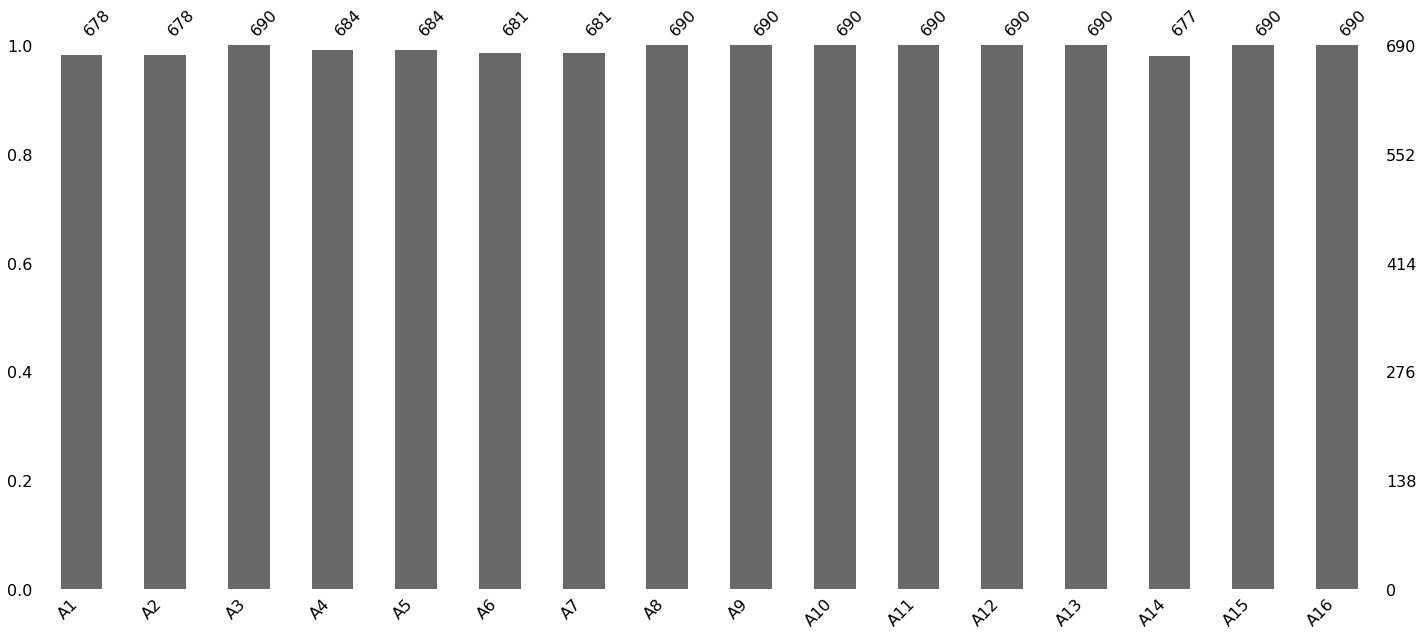

In [35]:
import missingno as msno

msno.bar(df)

Jak możemy łatwo zauważyć, najczęściej równocześnie brakuje wartości w kolumnach **A1**, **A2** oraz **A14**.

## Usuwanie i wypełnianie brakujących danych

Jak widzimy, danych brakuje w kolumnach **A1**, **A2**, **A4**, **A5**, **A6**, **A7** oraz **A14**. Kolumny **A2** oraz **A14** zawierają dane ciągłe (liczbowe), natomiast kolumny **A1**, **A4**, **A5**, **A6**, **A7** zawierają dane kategoryczne.

#### Konwersja danych na odpowiedni typ

Jak możemy zauważyć, dane w niektórych kolumnach mają nieprawidłowy typ. Przed przystąpieniem do ich uzupełniania, skonwertujemy te dane na odpowiedni typ dla danej kolumny.

In [36]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [37]:
data_types = {
  'A1': 'category',
  'A2': 'float64',
  'A3': 'float64',
  'A4': 'category',
  'A5': 'category',
  'A6': 'category',
  'A7': 'category',
  'A8': 'float64',
  'A9': 'category',
  'A10': 'category',
  'A11': 'float64',
  'A12': 'category',
  'A13': 'category',
  'A14': 'float64',
  'A15': 'float64',
  'A16': 'category'
}

df = df.astype(data_types)

Sprawdźmy jeszcze, czy dane w kolumnach otrzymały prawidłowe typy. Jak widzimy, rozmiar danych zmniejszył się o połowę, dzięki zastosowaniu prawidłowego kodowania.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      678 non-null    category
 1   A2      678 non-null    float64 
 2   A3      690 non-null    float64 
 3   A4      684 non-null    category
 4   A5      684 non-null    category
 5   A6      681 non-null    category
 6   A7      681 non-null    category
 7   A8      690 non-null    float64 
 8   A9      690 non-null    category
 9   A10     690 non-null    category
 10  A11     690 non-null    float64 
 11  A12     690 non-null    category
 12  A13     690 non-null    category
 13  A14     677 non-null    float64 
 14  A15     690 non-null    float64 
 15  A16     690 non-null    category
dtypes: category(10), float64(6)
memory usage: 41.2 KB


### Dane liczbowe

#### Kolumna A2

In [39]:
df["A2"].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: A2, dtype: float64

Jak widzimy, średnia (31.568171) oraz mediana (28.460000) mają zbliżone wartości. Oznacza to, że rozkład jest zbliżony do normalnego i nie ma wartości odstających. W tym przypadku brakujące wartości można uzupełnić wartością średnią.

In [40]:
df['A2'].fillna(df['A2'].mean(), inplace=True)

#### Kolumna A14

In [41]:
df["A14"].describe()

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: A14, dtype: float64

W przypadku tej kolumny, średnia (184.014771) już bardziej zauważalnie odstaje od mediany (160.000000). Ponieważ różnica jest większa, zastąpienie brakujących wartości medianą będzie lepszym pomysłem.

In [42]:
df['A14'].fillna(df['A14'].median(), inplace=True)

### Dane kategoryczne

Ponieważ niewiele wierszy ma brakujące dane w analizowanym zbiorze danych, najlepszym sposobem na uzupełnienie brakujących danych kategorycznych będzie ich uzupełnienie, przy pomocy najczęściej występującej wartości. Oczywiście, moglibyśmy usunąć całe wiersze, w których brakuje danych, ale nie jest to najlepsze rozwiązanie, ponieważ w ten sposób moglibyśmy się pozbyć wierszy, zawierających cenne informacje.

In [43]:
for column in ("A1", "A4", "A5", "A6", "A7"):
  df[column].fillna(df[column].mode()[0], inplace=True)

### Sprawdzenie, czy wciąż brakuje wartości

Jak widać, udało nam się uzupełnić wszystkie brakujące wartości w zbiorze danych. W ten sposób zakończyliśmy pierwszy etap preprocessingu danych.

In [44]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

# Macierz rozrzutu (scatter matrix)

Na poniższych wykresach widzimy jedynie dane numeryczne, ponieważ dane kategoryczne nie mogą zostać przedstawione w postaci takich wykresów.

Na poniższych wykresach trudno zaobserwować silny trend. W przypadku cech **A2** i **A3**, **A2** i **A8** oraz **A3** i **A8** daje się zaobserwować nieznaczną zależność cech, ponieważ punkty układają się wzdłuż prostej. 

NameError: name 'plt' is not defined

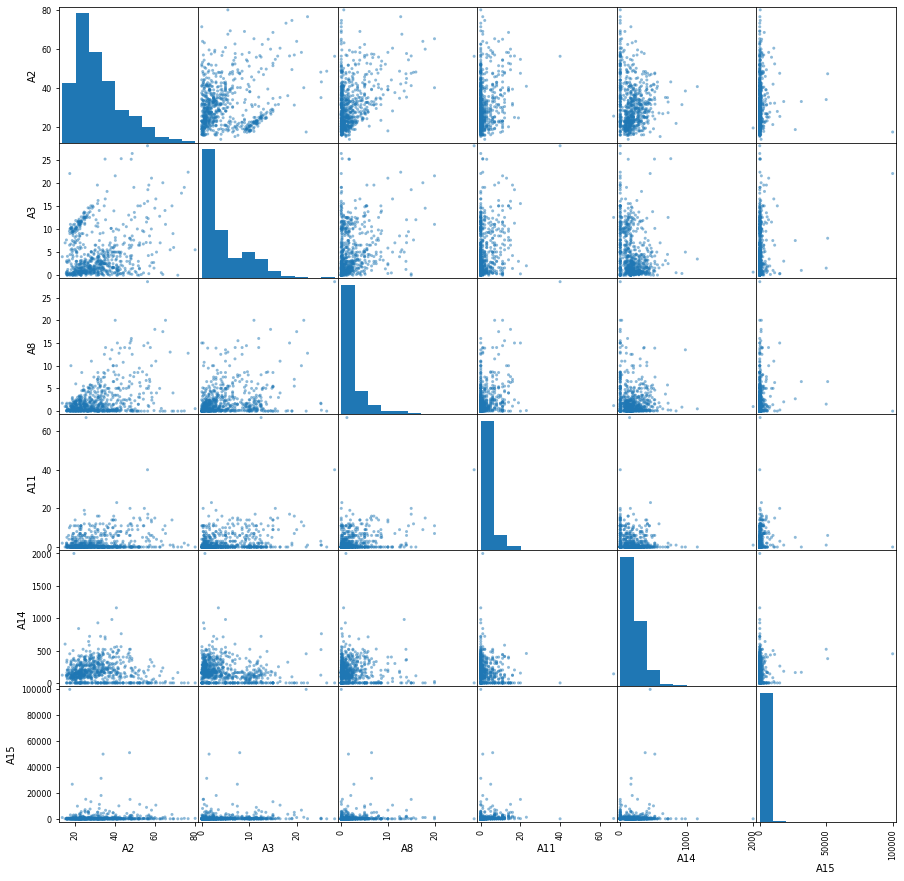

In [45]:
pd.plotting.scatter_matrix(df, diagonal='hist', figsize=(15, 15))
plt.show()

Korelację cech lepiej będzie się dało zauważyć, korzystając z wykresu typu **heatmap**.

<AxesSubplot:>

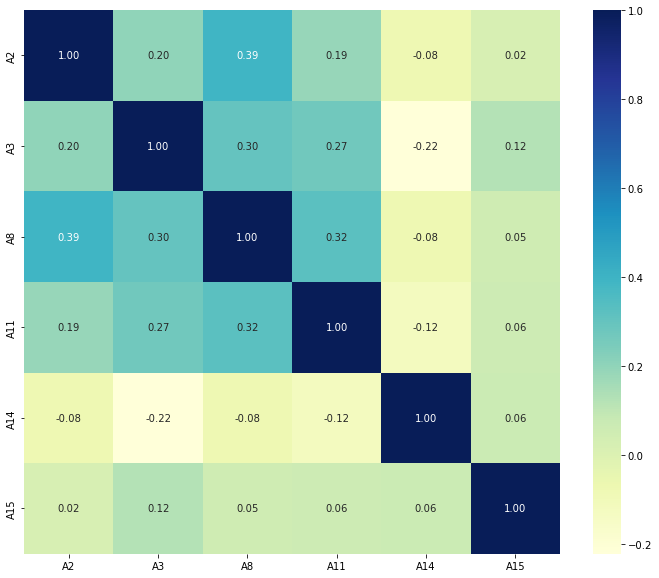

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

Jak widzimy, w zbiorze danych nie ma silnych korelacji cech.

# Kodowanie wartości nominalnych

Przy tworzeniu poniższych opisów kierowaliśmy się dokumentacją biblioteki `sklearn`. Informacje dotyczące tego, jakie dane są dopuszczalne w przypadku danego klasyfikatora, odczytaliśmy z dokumentacji odpowiednich implementacji w bibliotece `sklearn`.

**Klasyfikator Naiwny Bayesa**
- Obie reprezentacje są dopuszczalne (nominalna i po zakodowaniu),
- Najlepiej radzi sobie z danymi kategorycznymi.
- Najlepiej działa z danymi niezależnymi od siebie (jak można zauważyć z heatmapy powyżej, dane w zdecydowanej większości są od siebie mało zależne),
- gdy cecha ma dużą ilość wartości kategorycznych to warto zastosować one hot encoding w celu zwiększenia dokładności klasyfikacji, ale w przypadku małej liczby wartości nie powinien mieć dużego wpływu na dokładność.

**Klas. k-NN**
- Obie reprezentacje są dopuszczalne,
- Warto zastosować one hot encoding w celu polepszenia wyników klasyfikacji, ale może zwiększyć czas obliczeń.

**Klas. SVM**
- Obie reprezentacje są dopuszczalne,
- Dzięki zastosowaniu One hot encodingu można zwiększyć dokładność predykcji, ale w niektóych przypadkach może prowadzić do overfittingu. Zwiększa to też czas obliczeń. W wielu przypadkach lepiej zastosować inny sposób kodowania (Ordinal encoding - inne wartości oprócz 0 i 1),
- Wybór reprezentacji ma mniejsze znaczenie niż w k-NN.

**Lasy losowe**
- Z obiema reprezentacjami radzi sobie dobrze,
- Jeżeli dane kategoryczne są od siebie zależne one hot encoding zmniejsza dokładność klasyfikacji.

## Kodowanie danych nominalnych

Przed przystąpieniem do preprocessingu danych, zakodujemy dane kategoryczne, korzystając z metody one-hot encoding.

In [ ]:
df.shape

(690, 16)

In [ ]:
df = pd.get_dummies(data=df,columns=["A1","A4","A5","A6","A7","A9","A10","A12","A13"])
df.shape

(690, 47)

Jak widzimy, otrzymany dataframe ma o 31 kolumn więcej od poprzedniego. Ponieważ operujemy na niewielkim zbiorze danych, możemy sobie pozwolić na taki wybór kodowania i znacząco zwiększona liczba kolumn nam nie przeszkadza, a może poprawić wyniki treningu.

In [ ]:
df.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,+,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,+,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,+,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,+,0,1,0,...,0,0,1,1,0,1,0,0,0,1


# Preprocessing danych i dokładność klasyfikatorów

## Przygotowanie zbiorów danych

Przekształcimy teraz kolumnę, zawierającą oczekiwane wyniki predykcji na wartości boolowskie. Ze zbioru wykorzystywanego do treningu (**X**) usuwamy zbiór wyników (cech do przewidzenia). Zbiór **y**, zawierający prawidłowe wyniki predyjkcji.

In [ ]:
df["A16"] = (df["A16"] == "+").astype(np.int8)
df["A16"].value_counts()

0    383
1    307
Name: A16, dtype: int64

In [ ]:
X = df.drop("A16", axis=1)
y = df["A16"]

X.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


## Podział na zbiór treningowy i testowy

Przed przystąpieniem do preprocessingu danych, należy dokonać podziału zbioru danych na zbiór treningowy i testowy.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Skalowanie cech oraz testowanie dokładności klasyfikacji

In [ ]:
from scipy import stats

def confidence_interval(scores):
  mean_score = np.mean(scores)
  std_score = np.std(scores)
  ci_lower, ci_upper = stats.t.interval(0.95, len(scores)-1, loc=mean_score, scale=std_score)
  return ci_lower, ci_upper

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gnb = GaussianNB()
svc = SVC()

scalers = [None, StandardScaler(), MinMaxScaler()]

results = {}

for scaler in scalers:
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    folds = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler_name = scaler.__class__.__name__ if scaler else "no scaler"
    
    for classifier, classifier_name in ((knn, "KNN"), (rf, "Random Forest"), (gnb, "Naive Bayes"), (svc, "SVM (SVC)")):
        scores = cross_val_score(classifier, X_train_scaled, y_train, cv=folds)
        
        if classifier_name not in results:
            results[classifier_name] = {}
        results[classifier_name][scaler_name] = {
            'scores': scores,
            'mean_score': np.mean(scores),
            'confidence_interval': confidence_interval(scores),
        }

## Porównanie wyników

Zapiszmy najpierw wyniki w bardziej czytelnej postaci. Poniższa tabela zawiera zebrane wyniki wraz z 95% przedziałami ufności.

In [ ]:
column_names = pd.DataFrame([
  ["Bez skalowania", "Wynik"], 
  ["Bez skalowania", "Przedział ufności"],
  ["Standaryzacja", "Wynik"], 
  ["Standaryzacja", "Przedział ufności"],
  ["Normalizacja", "Wynik"], 
  ["Normalizacja", "Przedział ufności"],
],  columns=["", ""])

rows = [[f'({v[0]:.3f}, {v[1]:.3f})' if type(v) == tuple else f'{v:.3f}' for v in [
  res["no scaler"]["mean_score"], 
  res["no scaler"]["confidence_interval"], 
  res["StandardScaler"]["mean_score"], 
  res["StandardScaler"]["confidence_interval"], 
  res["MinMaxScaler"]["mean_score"], 
  res["MinMaxScaler"]["confidence_interval"]
]] for res in results.values()]

index = results.keys()

columns = pd.MultiIndex.from_frame(column_names)
table_df = pd.DataFrame(rows, columns=columns, index=index)
display(table_df)

Bez skalowania                   Standaryzacja  \
                       Wynik Przedział ufności         Wynik   
KNN                    0.688    (0.516, 0.861)         0.837   
Random Forest          0.879    (0.788, 0.969)         0.877   
Naive Bayes            0.846    (0.726, 0.966)         0.739   
SVM (SVC)              0.674    (0.558, 0.790)         0.850   

                                Normalizacja                    
              Przedział ufności        Wynik Przedział ufności  
KNN              (0.709, 0.965)        0.869    (0.694, 1.045)  
Random Forest    (0.781, 0.973)        0.877    (0.777, 0.977)  
Naive Bayes      (0.517, 0.961)        0.766    (0.579, 0.953)  
SVM (SVC)        (0.752, 0.947)        0.861    (0.743, 0.978)

Jak można łatwo zauważyć, w przypadku klasyfikatora KNN oraz metody wektorów nośnych, wykorzystanie skalowania dało znaczącą poprawę wyniku (najlepszy wynik przy wykorzystaniu standaryzacji). 

W przypadku klasyfikatora Random Forest, wynik jest prawie taki sam dla przeskalowanych danych oraz dla danych bez skalowania. W przypadku klasyfikatora Random Forest, wykorzystanie skalowania nieznacznie pogarsza otrzymane wyniki. 

Skalowanie, w przypadku metody naiwnego Bayesa, spowodowało zauważalne pogorszenie wyników klasyfikatorów.

## Wnioski

Jak widzimy, w przypadku klasyfikatorów, których metryka polega na obliczaniu odległości, na podstawie wartości cech (metoda KNN, SVM (SVC)), skalowanie wartości jest bardzo pożądane i eliminuje zaburzenie wyników, spowodowane różnicą zakresów wartości różnych cech.

# Wykresy

Wykresy wykonaliśmy dla klasyfikatora Random Forest z wykorzystaniem standard scalera.

## Precision-recall curve

Jak widzimy, krzywa jest blisko prawego górnego narożnika wykresu, więc klasyfikator jest całkiem niezły.

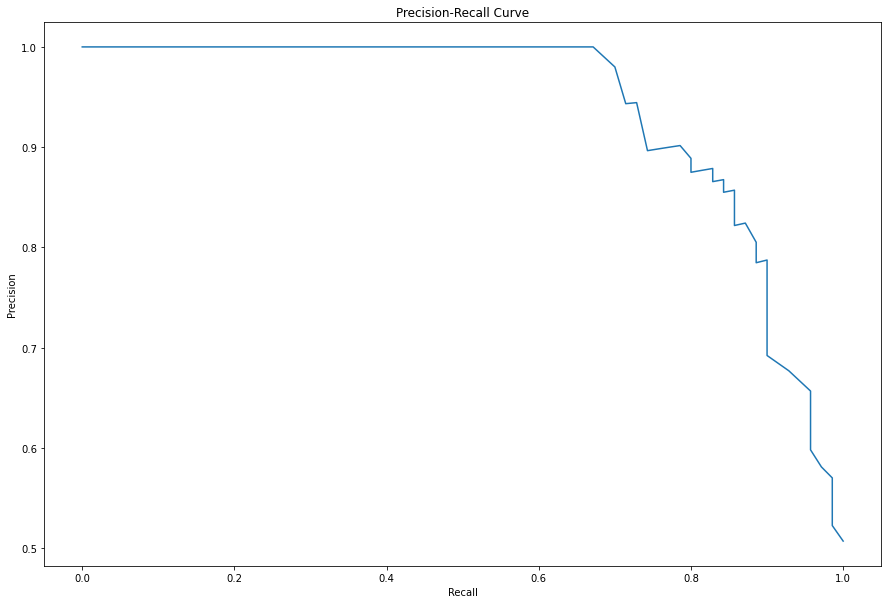

In [ ]:
from sklearn.metrics import precision_recall_curve

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

X_test = scaler.transform(X_test)

y_score = rfc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.figure(figsize=(15, 10))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Receiver operating characteristic

W tym przypadku, im krzywa jest bliżej lewego górnego narożnika, tym lepiej. Obserwujemy więc całkiem dobry wynik, ponieważ krzywa na poniższym wykresie jest bliska lewemu górnemu narożnikowi.

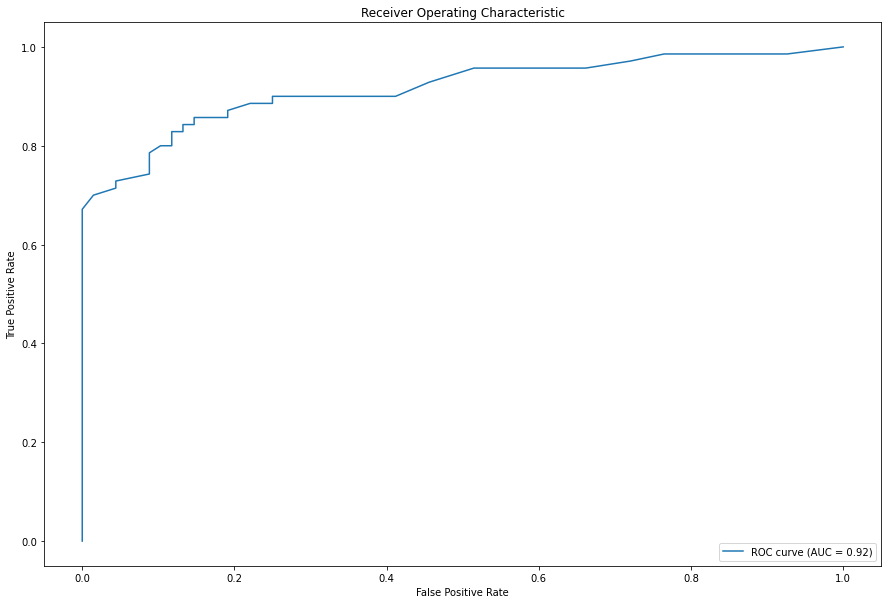

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=rfc.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()